In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

---
## 이미지 더하기
#### cv2.add() vs Numpy
- add : 0이하는 모두 0, 255이상은 255
- numpy : modulo연산, 256보다 큰 값은 256의 나머지로


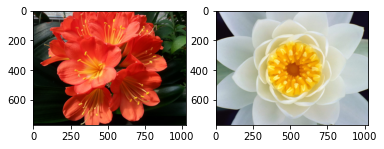

In [2]:
img1 = cv2.imread("flower1.jpg")
img2 = cv2.imread("flower2.jpg")

b,g,r = cv2.split(img1)
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(img2)
img2 = cv2.merge([r,g,b])

plt.subplot(121);plt.imshow(img1)
plt.subplot(122);plt.imshow(img2)

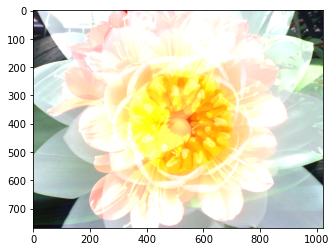

In [3]:
# opencv add
img = cv2.add(img1,img2)
plt.imshow(img)

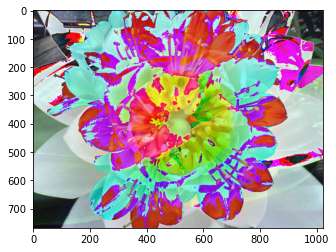

In [4]:
# numpy add
img = img1+img2
plt.imshow(img)

---
## 이미지 Blending
- 가중치를 두어 합치는 방법
### cv2.addWeighted
$$g(x)=(1−α)f0(x)+αf1(x)$$


In [5]:
# trackbar를 이용하여 alpha값을 조정

img1 = cv2.imread("flower1.jpg")
img2 = cv2.imread("flower2.jpg")

def nothing(x):
    pass

cv2.namedWindow("result")
cv2.createTrackbar("Alpha", "result", 0, 1000, nothing)

while True:
    alpha = cv2.getTrackbarPos('Alpha','result')
    # img1 * 1-alpha + img2 * alpha + gamma(0)
    img = cv2.addWeighted(img1,float(1000-alpha)/1000,img2,float(alpha)/1000,0)
    cv2.imshow("result",img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

---
## 비트연산
이미지에서 바탕을 제거하는 등, 특정 영역을 추출할 때 유용하게 사용

In [6]:
import cv2

apple = cv2.imread('image2.jpg')
lion = cv2.imread('lion.png')

b,g,r = cv2.split(apple)
apple = cv2.merge([r,g,b])
b,g,r = cv2.split(lion)
lion = cv2.merge([r,g,b])

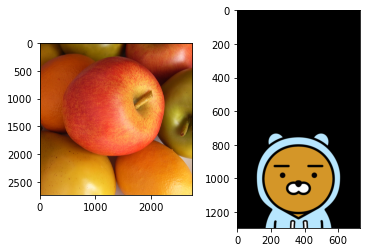

In [7]:
plt.subplot(121);plt.imshow(apple)
plt.subplot(122);plt.imshow(lion)

In [8]:
# 삽입할 이미지의 정보를 이용하여, 배경 이미지의 ROI 지정
row, col, channel  = lion.shape
roi = apple[:row, :col]

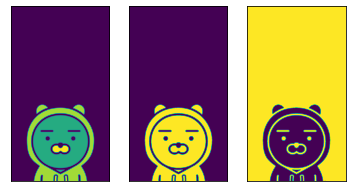

In [9]:
# Bitwise And연산을 이용하기 위하여, 삽입하고자 하는 이미지를 Binary형으로

# 먼저 Grayscale로 변환
lion_gray = cv2.cvtColor(lion, cv2.COLOR_RGB2GRAY)
# cv2.threshold를 이용하여 binary이미지로 변환. 10 이상의 값은 255, o.w 0으로 (물체만 255)
ret, lion_mask = cv2.threshold(lion_gray, 50, 255, cv2.THRESH_BINARY)
# 이진화된 mask값을 뒤집음(배경만 255)
lion_mask_inv = cv2.bitwise_not(lion_mask)

plt.subplot(131);plt.xticks([]);plt.yticks([]);plt.imshow(lion_gray)
plt.subplot(132);plt.xticks([]);plt.yticks([]);plt.imshow(lion_mask)
plt.subplot(133);plt.xticks([]);plt.yticks([]);plt.imshow(lion_mask_inv)

In [10]:
# bitwise_and는 둘 다 0이 아닌 경우를 통과시킴

# roi배경만 살아남음
apple_bg = cv2.bitwise_and(roi,roi, lion_mask_inv)
# lion의 물체정보만 살아남음
lion_fg = cv2.bitwise_and(lion,lion,lion_mask)

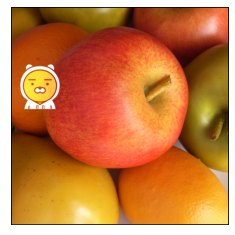

In [12]:
# roi부분을 합침 --> lion과 apple의 배경이 합쳐짐
result = cv2.add(apple_bg, lion_fg)
# 합쳐진 roi를 원래 배경과 다시 합침
apple[:row,:col] = result

plt.imshow(apple)
plt.xticks([])
plt.yticks([])
plt.show()